# **Name: Gagan Khadka**

# **University ID: 2330524**

# **Assignment-3**

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sklearn utilities
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    mean_squared_error, r2_score,
    accuracy_score, precision_score, recall_score, f1_score
)

sns.set(style="whitegrid")


Mounted at /content/drive


# **Part A: Regression Task(AQI Dataset)**

In [2]:
aqi = pd.read_csv('/content/drive/MyDrive/AI/AQI.csv')
aqi.head()

,Date,Country,City,Specie,count,min,max,median,variance
0,9/9/2024,IS,Reykjavík,pressure,144,1006.0,1012.0,1006.0,39.65
1,7/10/2025,IS,Reykjavík,pressure,144,1002.0,1005.0,1004.0,9.07
2,5/15/2024,IS,Reykjavík,pressure,138,1011.0,1012.0,1012.0,1.91
3,12/9/2024,IS,Reykjavík,pressure,144,1012.0,1029.0,1014.0,342.16
4,4/2/2024,IS,Reykjavík,pressure,144,1023.0,1026.0,1024.0,6.70


Data Understanding

In [3]:
aqi.shape
aqi.info()
aqi.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048571 entries, 0 to 1048570
Data columns (total 9 columns):
 #   Column    Non-Null Count    Dtype  
---  ------    --------------    -----  
 0   Date      1048571 non-null  object 
 1   Country   1048571 non-null  object 
 2   City      1048571 non-null  object 
 3   Specie    1048571 non-null  object 
 4   count     1048571 non-null  int64  
 5   min       1048571 non-null  float64
 6   max       1048571 non-null  float64
 7   median    1048571 non-null  float64
 8   variance  1048571 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 72.0+ MB


,count,min,max,median,variance
count,1.048571e+06,1.048571e+06,1.048571e+06,1.048571e+06,1.048571e+06
mean,1.703978e+02,1.024566e+02,1.266545e+02,1.117704e+02,1.586388e+03
std,2.586596e+02,2.875297e+02,2.872869e+02,2.876605e+02,5.413920e+04
min,2.000000e+00,-3.236000e+03,-6.420000e+01,-6.430000e+01,0.000000e+00
25%,4.600000e+01,1.000000e+00,9.500000e+00,3.500000e+00,1.752000e+01
50%,9.200000e+01,4.300000e+00,2.450000e+01,1.250000e+01,8.681000e+01
75%,1.920000e+02,2.000000e+01,7.400000e+01,3.440000e+01,5.270600e+02
max,2.616000e+03,1.044200e+03,3.244000e+03,1.853400e+03,2.230750e+07


Data Cleaning

In [4]:
# Strip column names
aqi.columns = aqi.columns.str.strip()

# Convert date
aqi['Date'] = pd.to_datetime(aqi['Date'], errors='coerce')

# Drop rows with missing target
aqi = aqi.dropna(subset=['median'])

EDA

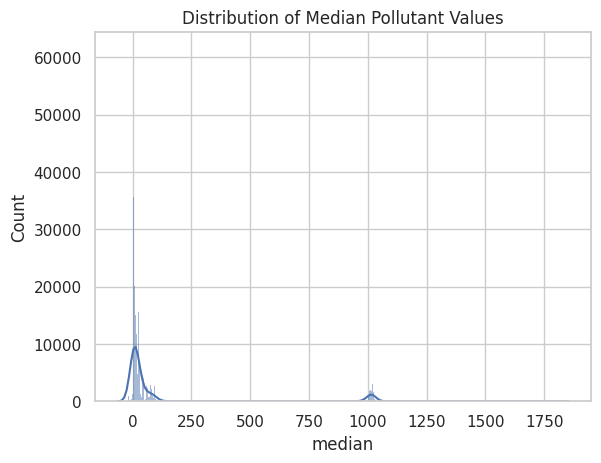

In [5]:
sns.histplot(aqi['median'], kde=True)
plt.title("Distribution of Median Pollutant Values")
plt.show()

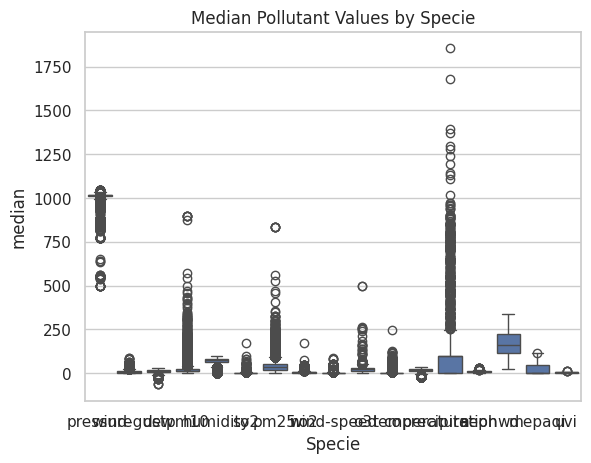

In [6]:
sns.boxplot(x='Specie', y='median', data=aqi)
plt.title("Median Pollutant Values by Specie")
plt.show()

Correlation Matrix

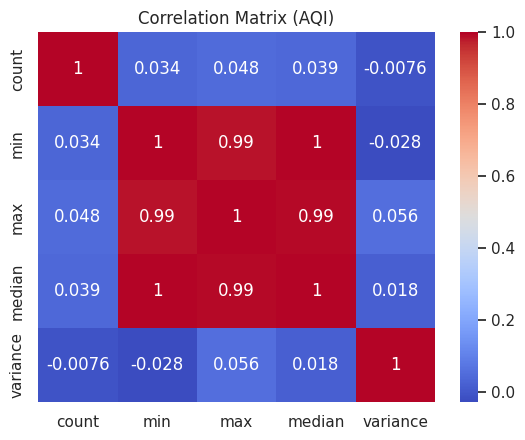

In [7]:
sns.heatmap(
    aqi[['count','min','max','median','variance']].corr(),
    annot=True, cmap='coolwarm'
)
plt.title("Correlation Matrix (AQI)")
plt.show()

Feature Selection

In [8]:
X = aqi.drop(columns=['median', 'Date', 'City'])
y = aqi['median']

X = pd.get_dummies(X, columns=['Country', 'Specie'], drop_first=True)


Train-Test Split & Scaling

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Neural Network Regressor

In [10]:
from sklearn.neural_network import MLPRegressor

mlp_reg = MLPRegressor(
    hidden_layer_sizes=(32,16),
    max_iter=200,
    early_stopping=True,
    random_state=42
)

mlp_reg.fit(X_train, y_train)

MLPRegressor(early_stopping=True, hidden_layer_sizes=(32, 16), random_state=42)

In [12]:
y_pred_mlp = mlp_reg.predict(X_test)
rmse_mlp = mean_squared_error(y_test, y_pred_mlp)
r2_mlp = r2_score(y_test, y_pred_mlp)

rmse_mlp, r2_mlp

(100.54144179205424, 0.9987937039949107)

Regression Models

Linear Regression

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)
rmse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

Random Forest

In [15]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    max_depth=10,
    n_jobs=-1,
    random_state=42
)

rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_jobs=-1, random_state=42)

Hyperparameter Tuning

In [16]:
param_grid = {
    'n_estimators': [50, 100],
    'max_depth': [5, 10]
}

grid_rf = GridSearchCV(
    rf, param_grid, cv=3, scoring='r2', n_jobs=-1
)

grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

In [18]:
y_pred_rf = best_rf.predict(X_test)
rmse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [19]:
print(rmse_rf)
print(r2_rf)

64.95366637372499
0.9992206860487979


# **Part B: Classification Task(Aquastat)**

In [20]:
aqua = pd.read_csv('/content/drive/MyDrive/AI/AQUASTAT.csv')
aqua.head()

,m49,VariableGroup,Subgroup,Variable,Area,Year,Value,Unit,Symbol,IsAggregate
0,4,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Afghanistan,2020,30.613807,%,I,False
1,4,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Afghanistan,2021,30.613807,%,I,False
2,4,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Afghanistan,2022,30.613807,%,I,False
3,8,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Albania,2020,1.804636,%,E,False
4,8,Water use,Pressure on water resources,Agricultural water withdrawal as % of total re...,Albania,2021,1.867550,%,E,False


In [21]:
aqua.shape
aqua.info()
aqua.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5319 entries, 0 to 5318
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   m49            5319 non-null   int64  
 1   VariableGroup  5319 non-null   object 
 2   Subgroup       5319 non-null   object 
 3   Variable       5319 non-null   object 
 4   Area           5319 non-null   object 
 5   Year           5319 non-null   int64  
 6   Value          5319 non-null   float64
 7   Unit           5319 non-null   object 
 8   Symbol         5319 non-null   object 
 9   IsAggregate    5319 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 379.3+ KB


,m49,Year,Value
count,5319.000000,5319.000000,5319.000000
mean,409.832487,2021.000000,93.496492
std,259.086101,0.816573,1079.119798
min,1.000000,2020.000000,0.000000
25%,188.000000,2020.000000,0.909587
50%,410.000000,2021.000000,6.826418
75%,642.000000,2022.000000,41.108115
max,894.000000,2022.000000,48183.156357


In [27]:
aqua['Value'] = pd.to_numeric(aqua['Value'], errors='coerce')

# Drop missing values
aqua = aqua.dropna(subset=['Value'])

In [28]:
aqua['Water_Stress_Class'] = pd.qcut(
    aqua['Value'],
    q=3,
    labels=['Low', 'Medium', 'High']
)

EDA

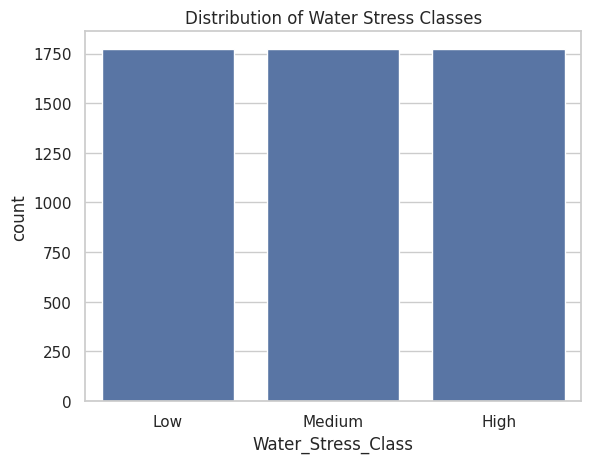

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Water_Stress_Class', data=aqua)
plt.title("Distribution of Water Stress Classes")
plt.show()

Correlation Matrix

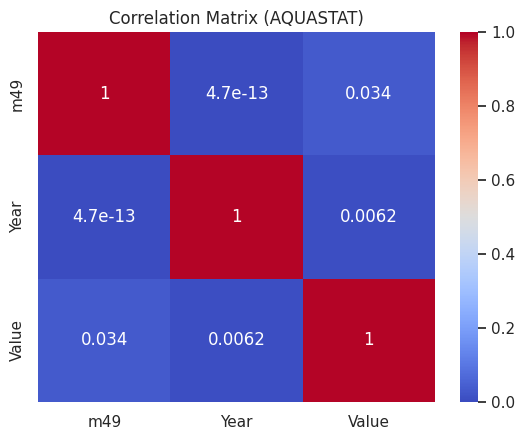

In [24]:
num_cols = aqua.select_dtypes(include=['int64','float64']).columns

sns.heatmap(aqua[num_cols].corr(),annot=True, cmap='coolwarm')
plt.title("Correlation Matrix (AQUASTAT)")
plt.show()

Feature & Target Selection

In [30]:
features = ['Value']
if 'Year' in aqua.columns:
    features.append('Year')

X = aqua[features]
y = aqua['Water_Stress_Class']

Encoding Labels

In [35]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

Train-Test Split and Scaling

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded,
    test_size=0.2,
    stratify=y_encoded,
    random_state=42
)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Neural Network Classifier

In [40]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(
    hidden_layer_sizes=(16,8),
    max_iter=200,
    early_stopping=True,
    random_state=42
)

mlp.fit(X_train, y_train)

MLPClassifier(early_stopping=True, hidden_layer_sizes=(16, 8), random_state=42)

In [41]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

y_pred = mlp.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='macro'))
print("Recall:", recall_score(y_test, y_pred, average='macro'))
print("F1:", f1_score(y_test, y_pred, average='macro'))

Accuracy: 0.893796992481203
Precision: 0.9163253881113252
Recall: 0.8938887562664121
F1: 0.8911673909287453


Classification Models

Logistic Regression

In [42]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=300)

Decision Tree

In [43]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(max_depth=8, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, random_state=42)

Hyperparameter Tuning

In [44]:
param_grid = {
    'max_depth': [5, 8, 10],
    'min_samples_split': [2, 5]
}

grid_dt = GridSearchCV(
    dt, param_grid, cv=3, scoring='f1_macro'
)

grid_dt.fit(X_train, y_train)
best_dt = grid_dt.best_estimator_

Evaluation Metrics

In [47]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate(model):
    y_pred = model.predict(X_test)
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='macro'),
        "Recall": recall_score(y_test, y_pred, average='macro'),
        "F1": f1_score(y_test, y_pred, average='macro')
    }

evaluate(log_reg)
evaluate(best_dt)
evaluate(mlp)


{'Accuracy': 0.893796992481203,
 'Precision': 0.9163253881113252,
 'Recall': 0.8938887562664121,
 'F1': 0.8911673909287453}